In [1]:
# Import all Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('HR Data.xlsx')

In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
##Column Name	Description :

#satisfaction_level : 	    satisfaction level at the job of an employee
#last_evaluation    :    	Rating   between 0 to 1, received by an employee at his last evaluation
#number_project     : 	    Number of projects, an employee involved in
#average_montly_hours:	Average number of hours in a month, spent by an employee at office
#time_spend_company	:   Number of years spent in the company
#Work_accident	    :   0 - no accident during employee stay, 1 - accident during employee stay
#left	            :   0 indicates employee stays in the company, 1 indicates - employee left the company
#promotion_last_5years: 	Number of promotions in his stay
#Department          : 	Department, an employee belongs to
#salary	            :   Salary in USD

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Null Values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
# Identify Categorical features.

In [9]:
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [10]:
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [11]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

<Axes: >

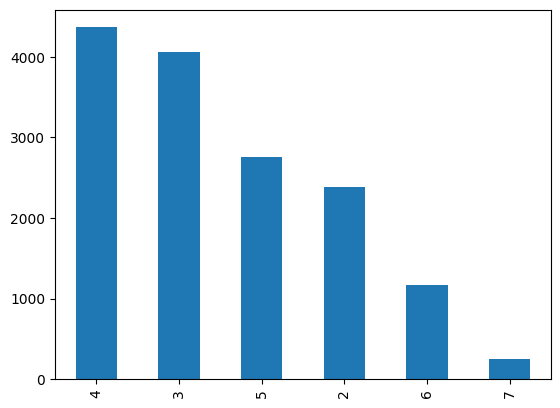

In [12]:
df['number_project'].value_counts().plot.bar()

In [13]:
# Work_accident

df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

<Axes: >

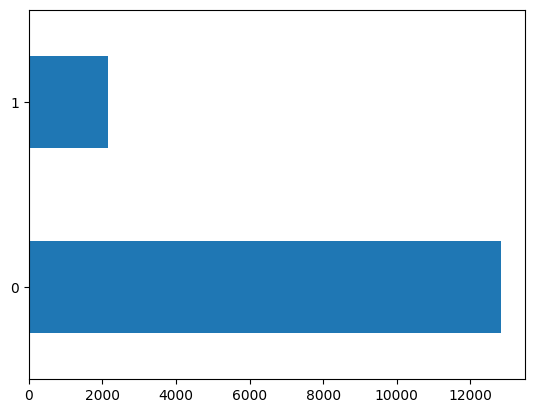

In [14]:
df['Work_accident'].value_counts().plot.barh( )

In [15]:
# left

df['left'].value_counts()

# Data is biased towards employees remained.

0    11428
1     3571
Name: left, dtype: int64

In [16]:
# sales

df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [17]:
# Exploratory Data Analysis

In [18]:
# 1. Display department wise no of people who left.

df.groupby('sales')['left'].value_counts().unstack()


left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='sales'>

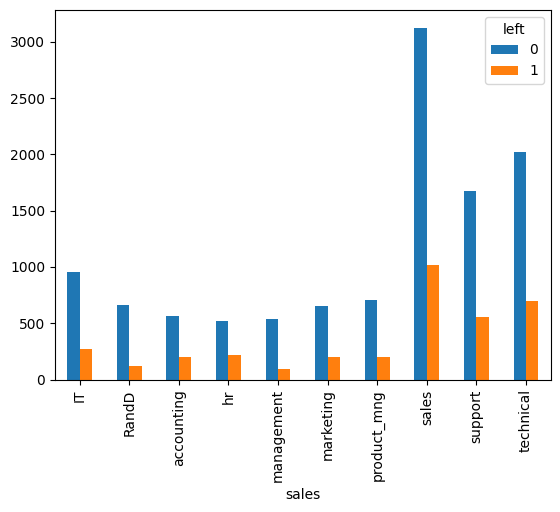

In [19]:
# Plot the result.
df.groupby('sales')['left'].value_counts().unstack().plot.bar()    # 0 : Stays    1: Left

In [20]:
# Determine and plot Total employees who left

# 1. Total No of Projects    2. Accidents   3. Salary

In [21]:
# 1. Total No of Projects
df.groupby('number_project')['left'].value_counts().unstack()    # 0 : Stays    1: Left

left,0,1
number_project,,
2,821.0,1567.0
3,3983.0,72.0
4,3956.0,409.0
5,2149.0,612.0
6,519.0,655.0
7,NaN,256.0


In [22]:
# 3. Salary
df.groupby('salary')['left'].value_counts().unstack()    # 0 : Stays    1: Left

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


In [23]:
# Correlation among i/p and o/p Features.

df.corr().round(2)

<ipython-input-23-8452d667f397>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


In [24]:
# Clustering =>  'satisfaction_level', 'last_evaluation' for wmployees who left.


In [25]:
dfcl = df[['satisfaction_level', 'last_evaluation', 'left']]
dfcl.head(2)

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1


In [26]:
# Use Kmeans for clustering

from sklearn.cluster import KMeans

In [27]:
km = KMeans(n_clusters = 3, max_iter= 1000)

In [28]:
labels = km.fit_predict(dfcl)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [30]:
dfcl[labels == 0].describe()    #  Mean : Sat = 0.44    Eva = 0.71

,satisfaction_level,last_evaluation,left
count,4708.000000,4708.000000,4708.0
mean,0.457984,0.680854,0.0
std,0.153456,0.165609,0.0
min,0.120000,0.360000,0.0
25%,0.350000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


In [31]:
dfcl[labels == 1].describe()    #  Mean : Sat = 0.45    Eva = 0.68

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


In [32]:
dfcl[labels == 2].describe()    #  Mean : Sat = 0.81    Eva = 0.73

,satisfaction_level,last_evaluation,left
count,6720.000000,6720.000000,6720.0
mean,0.813112,0.739728,0.0
std,0.108167,0.154900,0.0
min,0.590000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [33]:
dfcl

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [34]:
# Based on 'satisfaction_level' and 'last_evaluation' let us comment on labels.

In [38]:
km1 = dfcl.iloc[:].values      # data in array format

In [40]:
# KMeans Clustering Algorithm : Clusters = 3

km2 = KMeans(n_clusters=3, random_state= 0)
label = km2.fit_predict(dfcl)

label_array = km2.fit_predict(km1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# Plot scatterplot for all labels wrt 'satisfaction_level' and 'last_evaluation'.

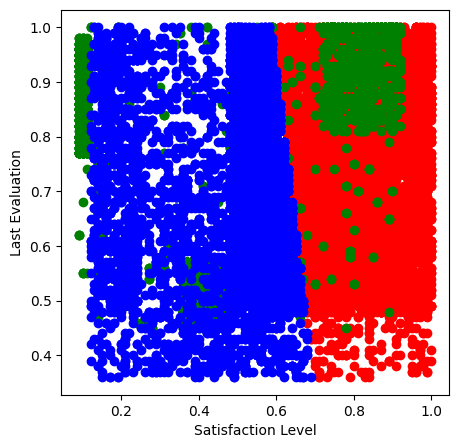

In [52]:
plt.figure(figsize = (5,5))

plt.scatter(km1[label == 0,0] , km1[label == 0,1], color ='red')
plt.scatter(km1[label == 1,0] , km1[label == 1,1], color ='green')
plt.scatter(km1[label == 2,0] , km1[label == 2,1], color ='blue')

plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

In [53]:
# Label 0 : Red :   Red Cluster denotes employess with high satisfaction level who scored high in last evaluation.
# Label 1 : Green : Green Cluster denotes employees with highest satisfaction level who scored moderate in last evaluation.
# Label 2 : Blus  : Blue cluster denotes employees with low satisfaction level who scored moderate in last evaluation.

In [54]:
# Classification :

In [55]:
# Apply Logistic Regression

In [56]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [57]:
# Saparate Numerical and object features

In [59]:
df_num = df.select_dtypes(exclude= 'object')
df_obj = df.select_dtypes(include = 'object')

In [60]:
df_obj.head()

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [63]:
# Apply One hot encoding to df_obj

df_dummies = pd.get_dummies(df_obj)
#df_dummies

In [64]:
# Concatinate numerical and categorical features

df_final = pd.concat([df_num, df_dummies], axis = 1)

In [66]:
# Saparate I/P and O/P features

X = df_final.drop('left', axis = 1)
Y = df_final['left']

In [67]:
# Split Data

from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 123)

In [70]:
X_train.shape, Y_train.shape

((11249, 20), (11249,))

In [71]:
Y_train.value_counts()

0    8576
1    2673
Name: left, dtype: int64

In [72]:
# Class Imbalance
# 1. Employees who "Stay" is almost 3 times in number than who "Left"
# 2. Model will be biased towards "Stay" option.
# This is Class Imbalance problem => Different statistical methods => SMOTE Analysis

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
sm = SMOTE()

In [75]:
Train_X, Train_Y = sm.fit_resample(X_train, Y_train)

In [76]:
Train_Y.value_counts()

0    8576
1    8576
Name: left, dtype: int64

In [77]:
# Apply Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [81]:
LR = LogisticRegression(max_iter= 1000)

In [82]:
LR.fit(Train_X, Train_Y)

LogisticRegression(max_iter=1000)

In [84]:
pred = LR.predict(X_test)

In [86]:
accuracy_score(Y_test, pred ).round(2)

0.77

In [87]:
confusion_matrix(Y_test, pred)

array([[2275,  577],
       [ 280,  618]])

In [89]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2852
           1       0.52      0.69      0.59       898

    accuracy                           0.77      3750
   macro avg       0.70      0.74      0.72      3750
weighted avg       0.80      0.77      0.78      3750

